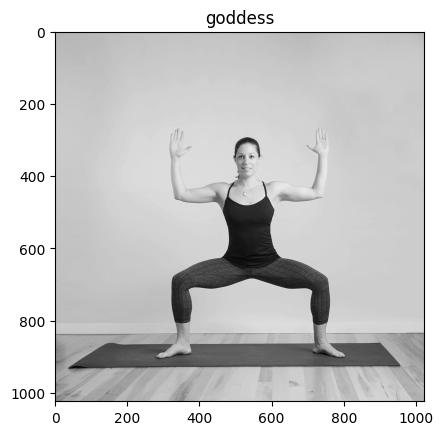

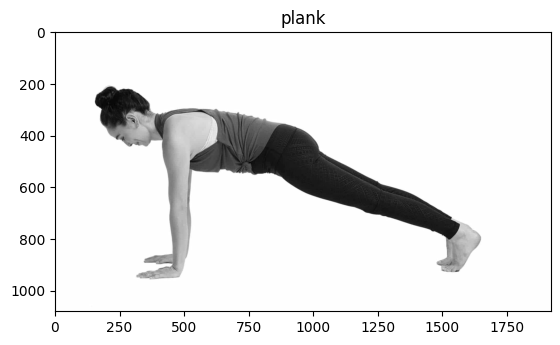

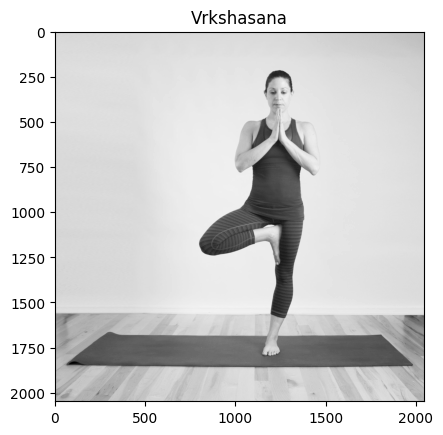

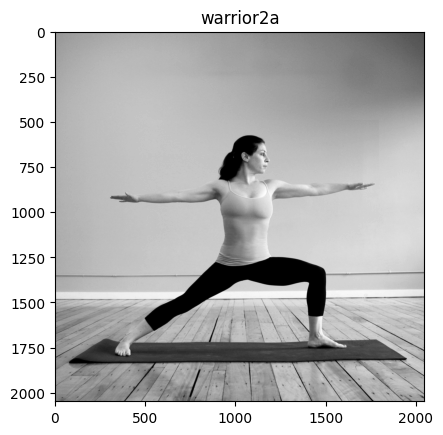

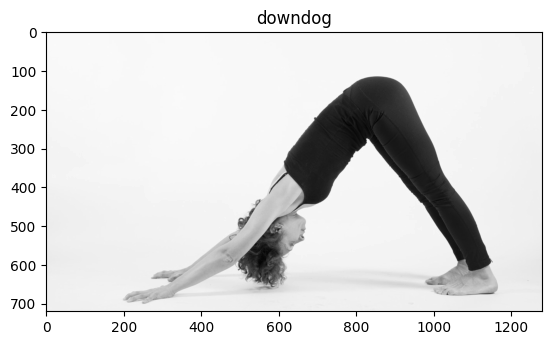

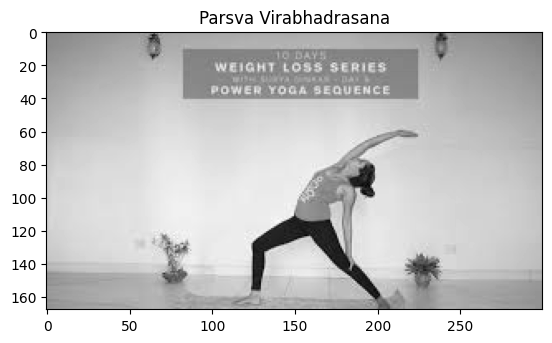

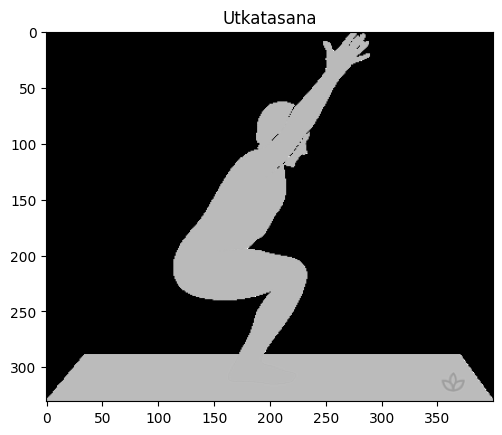

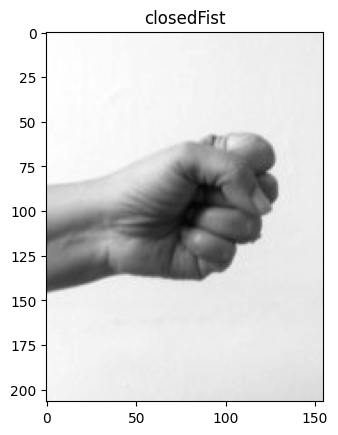

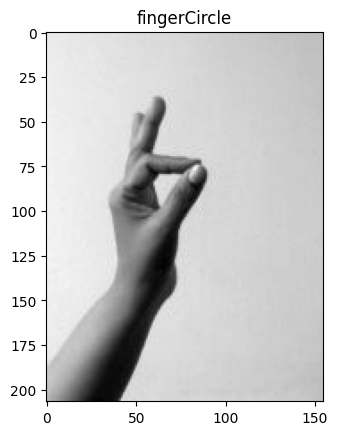

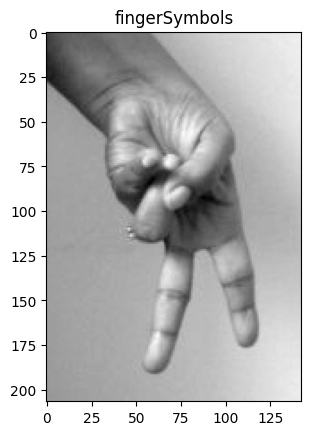

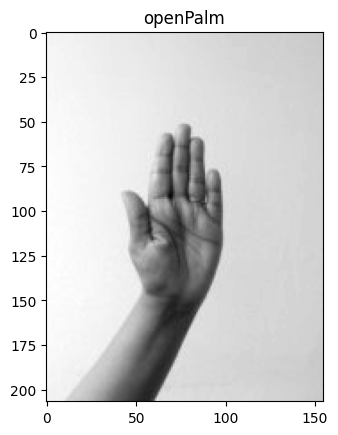

In [1]:

                                                        #:Loading Images
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

 #Folder Name:Dataset II
DATADIR = "Dataset II"

 #List of directories inside Dataset II directory
CATEGORIES = ["goddess", "plank", "Vrkshasana", "warrior2a", "downdog","Parsva Virabhadrasana","Utkatasana","closedFist","fingerCircle","fingerSymbols","openPalm"]  #Inside Dataset folder there exists
                                                                
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)  # create path to category
    for img in os.listdir(path):  # iterate over each image per category
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  # convert to array in grayscale
        if img_array is not None:
            plt.imshow(img_array, cmap='gray')  # display grayscale image
            plt.title(f'{category}')  # add title to indicate the category
            plt.show()  # display!


            break  # we just want one for now, so break to the next category


In [2]:
#Resizing images into fixed Size:
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# Define constants and initialize training data
IMG_SIZE = 50
training_data = []

# Function to create training data
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                print(f"Error processing image {img}: {e}")
                pass

create_training_data()
print(len(training_data))




  1%|▉                                                                                 | 3/261 [00:00<00:09, 27.47it/s]

Error processing image .ipynb_checkpoints: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



  2%|█▎                                                                                | 6/382 [00:00<00:08, 46.74it/s]

Error processing image .ipynb_checkpoints: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



  2%|█▎                                                                                | 5/321 [00:00<00:07, 41.47it/s]

Error processing image .ipynb_checkpoints: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



100%|███████████████████████████████████████████████████████████████████████████████| 184/184 [00:01<00:00, 103.60it/s]

2804


In [5]:
# !pip install mediapipe
# !pip install opencv-python
import math
import cv2
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [6]:
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils

Image shape: (408, 612, 3)
Image dtype: uint8


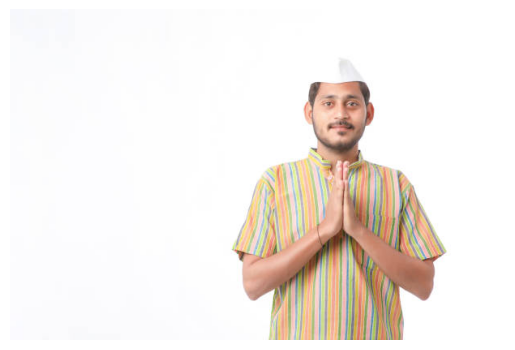

In [7]:
image_path = 'Dataset II/Namaste/namaskar18.jpg'
sample_img = cv2.imread(image_path)


# Check if the image was loaded correctly
if sample_img is not None:
    print(f"Image shape: {sample_img.shape}")
    print(f"Image dtype: {sample_img.dtype}")
    # Convert the image from BGR to RGB
    sample_img_rgb = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
    # Display the image
    plt.imshow(sample_img_rgb)
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Error: Image not loaded. Check the file path and format.")




In [9]:
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:

    # Iterates all 33 landmarks.
    for i in range(33):

        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.67193985
y: 0.323599875
z: -0.435200304
visibility: 0.994022071

LEFT_EYE_INNER:
x: 0.688462913
y: 0.287145376
z: -0.381793261
visibility: 0.984385908

LEFT_EYE:
x: 0.699622691
y: 0.288483262
z: -0.382183939
visibility: 0.984484792

LEFT_EYE_OUTER:
x: 0.707085729
y: 0.290341735
z: -0.382130265
visibility: 0.98495239

RIGHT_EYE_INNER:
x: 0.65487361
y: 0.284478903
z: -0.386325598
visibility: 0.991900086

RIGHT_EYE:
x: 0.643647432
y: 0.285011232
z: -0.386912018
visibility: 0.994568825

RIGHT_EYE_OUTER:
x: 0.634573162
y: 0.28613627
z: -0.387378424
visibility: 0.995336354

LEFT_EAR:
x: 0.715711474
y: 0.303387463
z: -0.0927920192
visibility: 0.992369652

RIGHT_EAR:
x: 0.61306417
y: 0.304313898
z: -0.112961054
visibility: 0.993171573

MOUTH_LEFT:
x: 0.686196208
y: 0.363586247
z: -0.322421789
visibility: 0.9904356

MOUTH_RIGHT:
x: 0.649472833
y: 0.361681461
z: -0.332152396
visibility: 0.991801798

LEFT_SHOULDER:
x: 0.780469358
y: 0.535739064
z: 0.0664435327
visibility: 0.996501684



In [10]:
                        #Image preprocessed , now using Pandas we create dataframe and convert it to csv file.
import os
import cv2
import mediapipe as mp
import pandas as pd
from tqdm import tqdm

# # Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

mp_drawing = mp.solutions.drawing_utils

# DataFrame to store the landmark coordinates
columns = []
for i in range(33):
    columns.extend([f'x_{i}_landmark', f'y_{i}_landmark', f'z_{i}_landmark'])
columns.append('category')  # Add column for the category
df = pd.DataFrame(columns=columns)

def extract_landmarks(image):
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark
        row = []
        for landmark in landmarks:
            row.extend([landmark.x, landmark.y, landmark.z])
        return row
    else:
        return None

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in tqdm(os.listdir(path)):
        try:
            img_path = os.path.join(path, img)
            image = cv2.imread(img_path)
            landmarks = extract_landmarks(image)
            if landmarks:
                landmarks.append(category)  # Add the category to the landmarks list
                df.loc[len(df)] = landmarks
            else:
                print(f"No landmarks detected in image: {img_path}")
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

# Save the DataFrame to a CSV file
df.to_csv('pose_landmarks_with_categories(Test).csv', index=False)



  0%|                                                                                          | 0/261 [00:00<?, ?it/s]

Error processing image Dataset II\goddess\.ipynb_checkpoints: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  1%|▋                                                                                 | 2/261 [00:02<05:01,  1.16s/it]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\goddess\00000004.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  3%|██▊                                                                               | 9/261 [00:02<00:46,  5.36it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\goddess\00000040.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\goddess\00000085.jpg
No landmarks detected in image: Dataset II\goddess\00000087.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\goddess\00000113.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 38%|██████████████████████████████▋                                                  | 99/261 [00:07<00:09, 16.51it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\goddess\00000120.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 41%|█████████████████████████████████                                               | 108/261 [00:08<00:07, 19.16it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\goddess\00000127.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 43%|██████████████████████████████████                                              | 111/261 [00:08<00:07, 19.40it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\goddess\00000146.jpg
No landmarks detected in image: Dataset II\goddess\00000149.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 48%|██████████████████████████████████████▎                                         | 125/261 [00:09<00:11, 12.22it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\goddess\00000165.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 52%|█████████████████████████████████████████▍                                      | 135/261 [00:09<00:07, 16.68it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\goddess\00000176.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 53%|██████████████████████████████████████████▎                                     | 138/261 [00:09<00:07, 17.24it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\goddess\00000191.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\goddess\00000206.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\goddess\00000258.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 71%|████████████████████████████████████████████████████████▋                       | 185/261 [00:12<00:04, 18.05it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\goddess\00000272.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\goddess\00000282.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 78%|██████████████████████████████████████████████████████████████▌                 | 204/261 [00:13<00:03, 18.61it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\goddess\00000291.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 80%|███████████████████████████████████████████████████████████████▊                | 208/261 [00:14<00:02, 17.72it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\goddess\00000299.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 81%|████████████████████████████████████████████████████████████████▉               | 212/261 [00:14<00:02, 18.11it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\goddess\00000315.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 84%|██████████████████████████████████████████████████████████████████▊             | 218/261 [00:14<00:03, 11.77it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\goddess\00000321.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 85%|████████████████████████████████████████████████████████████████████            | 222/261 [00:15<00:05,  7.77it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\goddess\00000329.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 87%|█████████████████████████████████████████████████████████████████████▉          | 228/261 [00:16<00:03,  9.50it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\goddess\00000339.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 90%|███████████████████████████████████████████████████████████████████████▋        | 234/261 [00:16<00:02, 13.24it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\goddess\00000377.jpg
No landmarks detected in image: Dataset II\goddess\00000380.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 97%|█████████████████████████████████████████████████████████████████████████████▏  | 252/261 [00:17<00:00, 13.33it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\goddess\00000400.jpg


  0%|                                                                                          | 0/382 [00:00<?, ?it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Error processing image Dataset II\plank\.ipynb_checkpoints: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  1%|▋                                                                                 | 3/382 [00:00<00:18, 20.68it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


No landmarks detected in image: Dataset II\plank\00000002.jpg
No landmarks detected in image: Dataset II\plank\00000005.jpg


  2%|█▎                                                                                | 6/382 [00:00<00:29, 12.93it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  2%|█▋                                                                                | 8/382 [00:00<00:36, 10.32it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-pack

No landmarks detected in image: Dataset II\plank\00000016.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  5%|███▊                                                                             | 18/382 [00:01<00:37,  9.74it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000021.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  6%|█████                                                                            | 24/382 [00:02<00:33, 10.58it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000033.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  9%|███████▏                                                                         | 34/382 [00:03<00:34, 10.16it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000055.jpg


 13%|██████████▊                                                                      | 51/382 [00:04<00:30, 10.70it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 14%|███████████▏                                                                     | 53/382 [00:05<00:31, 10.51it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-pack

No landmarks detected in image: Dataset II\plank\00000061.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 15%|████████████                                                                     | 57/382 [00:05<00:32, 10.06it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000073.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 18%|██████████████▏                                                                  | 67/382 [00:06<00:23, 13.33it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000088.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 21%|█████████████████▏                                                               | 81/382 [00:07<00:23, 12.84it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000095.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 23%|██████████████████▍                                                              | 87/382 [00:08<00:43,  6.74it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000104.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 25%|████████████████████▌                                                            | 97/382 [00:08<00:23, 12.03it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000116.png
No landmarks detected in image: Dataset II\plank\00000118.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 29%|██████████████████████▊                                                         | 109/382 [00:09<00:22, 12.24it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000128.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 31%|█████████████████████████▏                                                      | 120/382 [00:11<00:22, 11.66it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 32%|█████████████████████████▌                                                      | 122/382 [00:11<00:21, 12.14it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-pack

No landmarks detected in image: Dataset II\plank\00000133.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


No landmarks detected in image: Dataset II\plank\00000137.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 33%|██████████████████████████▌                                                     | 127/382 [00:11<00:23, 10.92it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000146.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 35%|███████████████████████████▊                                                    | 133/382 [00:12<00:19, 12.74it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000157.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 37%|█████████████████████████████▌                                                  | 141/382 [00:12<00:19, 12.31it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000170.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 40%|████████████████████████████████                                                | 153/382 [00:13<00:16, 13.83it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


No landmarks detected in image: Dataset II\plank\00000176.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 41%|████████████████████████████████▍                                               | 155/382 [00:13<00:19, 11.52it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000191.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 45%|███████████████████████████████████▊                                            | 171/382 [00:15<00:17, 11.91it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000196.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 46%|████████████████████████████████████▋                                           | 175/382 [00:15<00:20, 10.12it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000208.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 49%|███████████████████████████████████████▏                                        | 187/382 [00:16<00:17, 10.96it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000228.jpg
No landmarks detected in image: Dataset II\plank\00000230.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 54%|███████████████████████████████████████████▎                                    | 207/382 [00:18<00:15, 11.37it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000235.jpg
No landmarks detected in image: Dataset II\plank\00000236.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 56%|████████████████████████████████████████████▌                                   | 213/382 [00:19<00:13, 12.35it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000240.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 57%|█████████████████████████████████████████████▍                                  | 217/382 [00:19<00:21,  7.55it/s]

No landmarks detected in image: Dataset II\plank\00000244.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 57%|█████████████████████████████████████████████▊                                  | 219/382 [00:20<00:19,  8.19it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000249.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 59%|███████████████████████████████████████████████                                 | 225/382 [00:20<00:16,  9.29it/s]

No landmarks detected in image: Dataset II\plank\00000251.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 59%|███████████████████████████████████████████████▌                                | 227/382 [00:20<00:15,  9.94it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


No landmarks detected in image: Dataset II\plank\00000254.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 60%|███████████████████████████████████████████████▉                                | 229/382 [00:21<00:15,  9.88it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000266.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 63%|██████████████████████████████████████████████████▍                             | 241/382 [00:21<00:11, 12.04it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000279.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 66%|████████████████████████████████████████████████████▉                           | 253/382 [00:22<00:09, 13.09it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000287.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 68%|██████████████████████████████████████████████████████▏                         | 259/382 [00:23<00:10, 11.77it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000292.jpg


 69%|███████████████████████████████████████████████████████                         | 263/382 [00:23<00:10, 11.36it/s]

No landmarks detected in image: Dataset II\plank\00000294.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 69%|███████████████████████████████████████████████████████▍                        | 265/382 [00:24<00:13,  8.83it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000307.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 73%|██████████████████████████████████████████████████████████▋                     | 280/382 [00:25<00:10, 10.02it/s]

No landmarks detected in image: Dataset II\plank\00000310.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 74%|███████████████████████████████████████████████████████████                     | 282/382 [00:25<00:09, 10.74it/s]

No landmarks detected in image: Dataset II\plank\00000312.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 74%|███████████████████████████████████████████████████████████▍                    | 284/382 [00:25<00:08, 11.68it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000315.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 75%|████████████████████████████████████████████████████████████▎                   | 288/382 [00:26<00:07, 12.20it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000321.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 76%|█████████████████████████████████████████████████████████████▏                  | 292/382 [00:26<00:08, 10.17it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000325.jpg
No landmarks detected in image: Dataset II\plank\00000327.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 78%|██████████████████████████████████████████████████████████████▍                 | 298/382 [00:26<00:06, 12.08it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000330.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 79%|███████████████████████████████████████████████████████████████▏                | 302/382 [00:27<00:06, 12.67it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000337.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 81%|████████████████████████████████████████████████████████████████▌               | 308/382 [00:27<00:05, 13.87it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000344.jpg


 82%|█████████████████████████████████████████████████████████████████▎              | 312/382 [00:28<00:06, 10.09it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 82%|█████████████████████████████████████████████████████████████████▊              | 314/382 [00:28<00:06, 10.43it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-pack

No landmarks detected in image: Dataset II\plank\00000360.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 85%|████████████████████████████████████████████████████████████████████▎           | 326/382 [00:29<00:04, 12.75it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000369.jpg


 87%|█████████████████████████████████████████████████████████████████████▉          | 334/382 [00:29<00:03, 12.52it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 88%|██████████████████████████████████████████████████████████████████████▎         | 336/382 [00:29<00:03, 12.76it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-pack

No landmarks detected in image: Dataset II\plank\00000373.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 89%|███████████████████████████████████████████████████████████████████████▏        | 340/382 [00:30<00:03, 14.00it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 90%|███████████████████████████████████████████████████████████████████████▌        | 342/382 [00:30<00:02, 13.96it/s]

No landmarks detected in image: Dataset II\plank\00000378.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 90%|████████████████████████████████████████████████████████████████████████        | 344/382 [00:30<00:02, 14.15it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000390.jpg
No landmarks detected in image: Dataset II\plank\00000395.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 93%|██████████████████████████████████████████████████████████████████████████▏     | 354/382 [00:31<00:01, 14.21it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000423.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 98%|██████████████████████████████████████████████████████████████████████████████▋ | 376/382 [00:32<00:00, 14.75it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\plank\00000437.jpg


  0%|                                                                                          | 0/229 [00:00<?, ?it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  0%|▎                                                                                 | 1/229 [00:00<00:31,  7.27it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-pack

No landmarks detected in image: Dataset II\Vrkshasana\00000009.JPG


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  6%|████▌                                                                            | 13/229 [00:01<00:27,  7.94it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\00000014.jpg


  7%|██████                                                                           | 17/229 [00:02<00:21,  9.74it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  8%|██████▋                                                                          | 19/229 [00:02<00:19, 10.80it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-pack

No landmarks detected in image: Dataset II\Vrkshasana\00000027.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 14%|██████████▉                                                                      | 31/229 [00:04<00:29,  6.80it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\00000033.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 16%|█████████████                                                                    | 37/229 [00:04<00:20,  9.16it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\00000039.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 19%|███████████████▌                                                                 | 44/229 [00:05<00:19,  9.45it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\00000043.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 21%|████████████████▉                                                                | 48/229 [00:06<00:28,  6.46it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\00000059.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 28%|██████████████████████▎                                                          | 63/229 [00:07<00:11, 14.05it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\00000072.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 32%|█████████████████████████▊                                                       | 73/229 [00:08<00:18,  8.22it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\00000093.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 42%|██████████████████████████████████▎                                              | 97/229 [00:10<00:09, 14.36it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\00000106.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 48%|██████████████████████████████████████                                          | 109/229 [00:11<00:09, 12.10it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\00000115.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 52%|█████████████████████████████████████████▌                                      | 119/229 [00:12<00:10, 10.69it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\00000121.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 55%|███████████████████████████████████████████▋                                    | 125/229 [00:12<00:08, 12.06it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\00000126.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 56%|█████████████████████████████████████████████                                   | 129/229 [00:13<00:08, 11.47it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\00000134.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 60%|███████████████████████████████████████████████▊                                | 137/229 [00:13<00:07, 12.07it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\00000138.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 62%|█████████████████████████████████████████████████▎                              | 141/229 [00:14<00:06, 12.87it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\00000143.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 64%|███████████████████████████████████████████████████▎                            | 147/229 [00:14<00:06, 12.82it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\00000151.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 68%|██████████████████████████████████████████████████████▏                         | 155/229 [00:15<00:06, 11.42it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\00000158.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 70%|████████████████████████████████████████████████████████▏                       | 161/229 [00:15<00:06, 11.17it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\00000167.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 74%|███████████████████████████████████████████████████████████                     | 169/229 [00:17<00:10,  5.56it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\00000180.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 80%|███████████████████████████████████████████████████████████████▉                | 183/229 [00:18<00:04, 10.58it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\00000187.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 83%|██████████████████████████████████████████████████████████████████              | 189/229 [00:18<00:02, 13.42it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\00000202.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 89%|██████████████████████████████████████████████████████████████████████▉         | 203/229 [00:19<00:02, 12.30it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\File11.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 90%|████████████████████████████████████████████████████████████████████████▎       | 207/229 [00:20<00:01, 12.04it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\File38.jpg
No landmarks detected in image: Dataset II\Vrkshasana\File41.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 95%|███████████████████████████████████████████████████████████████████████████▊    | 217/229 [00:21<00:01, 11.77it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Vrkshasana\File83.jpg


  0%|                                                                                          | 0/361 [00:00<?, ?it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  0%|▏                                                                                 | 1/361 [00:00<01:10,  5.11it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-pack

No landmarks detected in image: Dataset II\warrior2a\00000067.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 19%|███████████████▍                                                                 | 69/361 [00:05<00:18, 15.63it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\warrior2a\00000099.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 27%|█████████████████████▊                                                           | 97/361 [00:07<00:19, 13.63it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\warrior2a\00000130.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 34%|███████████████████████████▍                                                    | 124/361 [00:09<00:13, 17.07it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\warrior2a\00000200.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 48%|██████████████████████████████████████▊                                         | 175/361 [00:13<00:22,  8.36it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\warrior2a\00000226.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 56%|████████████████████████████████████████████▌                                   | 201/361 [00:16<00:10, 14.81it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\warrior2a\00000279.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 67%|█████████████████████████████████████████████████████▋                          | 242/361 [00:19<00:09, 12.14it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\warrior2a\00000290.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 69%|███████████████████████████████████████████████████████▍                        | 250/361 [00:20<00:09, 11.28it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\warrior2a\00000313.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 74%|███████████████████████████████████████████████████████████▍                    | 268/361 [00:21<00:07, 13.15it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\warrior2a\00000320.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 76%|████████████████████████████████████████████████████████████▋                   | 274/361 [00:22<00:06, 13.09it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\warrior2a\00000347.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 83%|██████████████████████████████████████████████████████████████████▎             | 299/361 [00:24<00:04, 14.51it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 83%|██████████████████████████████████████████████████████████████████▋             | 301/361 [00:24<00:04, 14.61it/s]

No landmarks detected in image: Dataset II\warrior2a\00000351.jpg
No landmarks detected in image: Dataset II\warrior2a\00000353.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 84%|███████████████████████████████████████████████████████████████████▏            | 303/361 [00:24<00:03, 14.80it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\warrior2a\00000367.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 86%|████████████████████████████████████████████████████████████████████▉           | 311/361 [00:25<00:03, 13.96it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\warrior2a\00000373.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 88%|██████████████████████████████████████████████████████████████████████▏         | 317/361 [00:25<00:02, 14.73it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\warrior2a\00000423.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 97%|█████████████████████████████████████████████████████████████████████████████▊  | 351/361 [00:28<00:00, 15.05it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\warrior2a\00000436.jpg
No landmarks detected in image: Dataset II\warrior2a\00000438.jpg


  0%|                                                                                          | 0/321 [00:00<?, ?it/s]

Error processing image Dataset II\downdog\.ipynb_checkpoints: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  1%|▊                                                                                 | 3/321 [00:00<00:15, 20.11it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\downdog\00000026.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 10%|███████▊                                                                         | 31/321 [00:02<00:19, 14.63it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\downdog\00000049.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 16%|█████████████                                                                    | 52/321 [00:03<00:17, 15.24it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\downdog\00000080.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 21%|█████████████████▏                                                               | 68/321 [00:05<00:22, 11.27it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\downdog\00000101.jpg
No landmarks detected in image: Dataset II\downdog\00000106.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 26%|█████████████████████▍                                                           | 85/321 [00:06<00:16, 14.15it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\downdog\00000120.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\downdog\00000186.png
No landmarks detected in image: Dataset II\downdog\00000188.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 46%|█████████████████████████████████████▏                                          | 149/321 [00:09<00:11, 14.73it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\downdog\00000203.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 50%|████████████████████████████████████████                                        | 161/321 [00:10<00:09, 17.36it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\downdog\00000212.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 51%|█████████████████████████████████████████                                       | 165/321 [00:10<00:08, 18.01it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\downdog\00000222.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 55%|███████████████████████████████████████████▊                                    | 176/321 [00:11<00:09, 14.94it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\downdog\00000232.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 58%|██████████████████████████████████████████████                                  | 185/321 [00:11<00:09, 14.90it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\downdog\00000239.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\downdog\00000274.jpg


 66%|█████████████████████████████████████████████████████                           | 213/321 [00:13<00:05, 20.79it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\downdog\00000287.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\downdog\00000300.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\downdog\00000315.jpg
No landmarks detected in image: Dataset II\downdog\00000320.jpg


 77%|█████████████████████████████████████████████████████████████▌                  | 247/321 [00:14<00:03, 22.44it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\downdog\00000322.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\downdog\00000331.jpg
No landmarks detected in image: Dataset II\downdog\00000334.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 82%|█████████████████████████████████████████████████████████████████▎              | 262/321 [00:15<00:02, 21.34it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\downdog\00000361.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 89%|███████████████████████████████████████████████████████████████████████▎        | 286/321 [00:16<00:02, 17.18it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\downdog\00000367.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 91%|████████████████████████████████████████████████████████████████████████▊       | 292/321 [00:17<00:01, 19.83it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\downdog\00000387.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\downdog\00000420.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
100%|████████████████████████████████████████████████████████████████████████████████| 321/321 [00:18<00:00, 17.20it/s]


No landmarks detected in image: Dataset II\downdog\00000427.jpg


  0%|                                                                                           | 0/14 [00:00<?, ?it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 14%|███████████▊                                                                       | 2/14 [00:00<00:00, 19.86it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-pack

No landmarks detected in image: Dataset II\Parsva Virabhadrasana\File9.jpeg


  0%|                                                                                           | 0/81 [00:00<?, ?it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  4%|███                                                                                | 3/81 [00:00<00:03, 21.96it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-pack

No landmarks detected in image: Dataset II\Utkatasana\File1.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  7%|██████▏                                                                            | 6/81 [00:00<00:03, 19.90it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Utkatasana\File14.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 15%|████████████▏                                                                     | 12/81 [00:00<00:03, 22.47it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Utkatasana\File2.png
No landmarks detected in image: Dataset II\Utkatasana\File22.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 22%|██████████████████▏                                                               | 18/81 [00:00<00:02, 21.58it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Utkatasana\File24.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 30%|████████████████████████▎                                                         | 24/81 [00:01<00:02, 23.66it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 33%|███████████████████████████▎                                                      | 27/81 [00:01<00:02, 23.35it/s]

No landmarks detected in image: Dataset II\Utkatasana\File29.png
No landmarks detected in image: Dataset II\Utkatasana\File3.png
No landmarks detected in image: Dataset II\Utkatasana\File31.png
No landmarks detected in image: Dataset II\Utkatasana\File32.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\Utkatasana\File4.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 48%|███████████████████████████████████████▍                                          | 39/81 [00:01<00:01, 24.51it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Utkatasana\File49.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 59%|████████████████████████████████████████████████▌                                 | 48/81 [00:02<00:01, 24.65it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Utkatasana\File57.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 70%|█████████████████████████████████████████████████████████▋                        | 57/81 [00:02<00:00, 24.39it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Utkatasana\File62.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 78%|███████████████████████████████████████████████████████████████▊                  | 63/81 [00:02<00:00, 19.03it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Utkatasana\File67.png


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 85%|█████████████████████████████████████████████████████████████████████▊            | 69/81 [00:03<00:00, 21.35it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\Utkatasana\File8.png
No landmarks detected in image: Dataset II\Utkatasana\File81.png


  0%|                                                                                          | 0/212 [00:00<?, ?it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  4%|███▍                                                                              | 9/212 [00:00<00:04, 42.08it/s]

No landmarks detected in image: Dataset II\closedFist\IMG_20220430_180538.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220430_180543.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220430_180553.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220430_180610.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220430_180617.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220430_180630.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220430_182912.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220430_182941.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220430_182944.jpg


  7%|█████▎                                                                           | 14/212 [00:00<00:05, 39.52it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


No landmarks detected in image: Dataset II\closedFist\IMG_20220430_182948.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220430_182950.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220430_182951.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220430_182952.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  8%|██████▉                                                                          | 18/212 [00:00<00:05, 33.77it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\closedFist\IMG_20220501_151554.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220501_151610.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220501_151617.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220501_153429.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220501_153437.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220501_153514.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 12%|█████████▉                                                                       | 26/212 [00:00<00:05, 31.39it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\closedFist\IMG_20220501_163137.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220501_163139.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220501_163147.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_124525.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_124527.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_124531.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_124537.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_124539.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_124551.jpg


 25%|███████████████████▊                                                             | 52/212 [00:01<00:04, 37.04it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


No landmarks detected in image: Dataset II\closedFist\IMG_20220502_124553.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_124556.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_125649.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_125651.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_125653.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\closedFist\IMG_20220502_132324.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_135236.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 36%|█████████████████████████████                                                    | 76/212 [00:02<00:04, 28.16it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 40%|████████████████████████████████▍                                                | 85/212 [00:02<00:03, 32.49it/s]

No landmarks detected in image: Dataset II\closedFist\IMG_20220502_135257.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_140129.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_140131.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_140132.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_140139.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_140146.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_140147.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_140148.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\closedFist\IMG_20220502_141536.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_141538.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_142248.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_142251.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_142253.jpg


 45%|████████████████████████████████████▋                                            | 96/212 [00:03<00:04, 28.79it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 47%|█████████████████████████████████████▋                                          | 100/212 [00:03<00:03, 29.11it/s]

No landmarks detected in image: Dataset II\closedFist\IMG_20220502_142258.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_142307.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_142309.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220502_142311.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\closedFist\IMG_20220509_130947.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220509_130949.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220509_130950.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220509_131006.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220509_131007.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 53%|██████████████████████████████████████████▋                                     | 113/212 [00:03<00:03, 25.76it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 55%|███████████████████████████████████████████▊                                    | 116/212 [00:03<00:03, 26.67it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-pack

No landmarks detected in image: Dataset II\closedFist\IMG_20220509_131743.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220509_131746.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220509_131758.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220509_131813.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 58%|██████████████████████████████████████████████                                  | 122/212 [00:04<00:03, 24.44it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\closedFist\IMG_20220509_132724.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220509_132729.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220509_132733.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\closedFist\IMG_20220509_133942.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220509_133953.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220509_133957.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 65%|████████████████████████████████████████████████████                            | 138/212 [00:04<00:03, 22.93it/s]

No landmarks detected in image: Dataset II\closedFist\IMG_20220509_134011.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220509_134014.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220509_134539.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220509_134542.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220509_134544.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 67%|█████████████████████████████████████████████████████▏                          | 141/212 [00:05<00:03, 22.39it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


No landmarks detected in image: Dataset II\closedFist\IMG_20220509_134555.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220509_134600.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220509_134603.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 68%|██████████████████████████████████████████████████████▎                         | 144/212 [00:05<00:03, 20.70it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\closedFist\IMG_20220521_103938.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220521_103941.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220521_103944.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220521_103955.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220521_105534.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220521_105536.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220521_105539.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220521_105542.jpg


 73%|██████████████████████████████████████████████████████████▍                     | 155/212 [00:05<00:02, 28.21it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 75%|███████████████████████████████████████████████████████████▌                    | 158/212 [00:05<00:02, 25.19it/s]

No landmarks detected in image: Dataset II\closedFist\IMG_20220521_105546.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_141701.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_141704.jpg


 76%|█████████████████████████████████████████████████████████████▏                  | 162/212 [00:05<00:01, 25.20it/s]

No landmarks detected in image: Dataset II\closedFist\IMG_20220522_141706.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_141708.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_141711.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_141714.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_141719.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_141721.jpg


 78%|██████████████████████████████████████████████████████████████▋                 | 166/212 [00:05<00:01, 27.30it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 80%|███████████████████████████████████████████████████████████████▊                | 169/212 [00:06<00:01, 26.05it/s]

No landmarks detected in image: Dataset II\closedFist\IMG_20220522_142325.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_142327.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_142329.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\closedFist\IMG_20220522_164537.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_164542.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_164546.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_164559.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 86%|█████████████████████████████████████████████████████████████████████           | 183/212 [00:06<00:01, 26.73it/s]

No landmarks detected in image: Dataset II\closedFist\IMG_20220522_165426.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_165430.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_165433.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_165440.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_165444.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_165452.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_175334.jpg


 88%|██████████████████████████████████████████████████████████████████████▌         | 187/212 [00:06<00:00, 29.41it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\closedFist\IMG_20220522_175338.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_175341.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\closedFist\IMG_20220522_180444.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_180453.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_180456.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220522_180507.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220524_135917.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220524_135920.jpg


 96%|████████████████████████████████████████████████████████████████████████████▉   | 204/212 [00:07<00:00, 23.63it/s]

No landmarks detected in image: Dataset II\closedFist\IMG_20220524_135922.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220524_135932.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220524_135940.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220524_135942.jpg
No landmarks detected in image: Dataset II\closedFist\IMG_20220524_135951.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 98%|██████████████████████████████████████████████████████████████████████████████  | 207/212 [00:07<00:00, 24.03it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


No landmarks detected in image: Dataset II\closedFist\IMG_20220524_140954.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 99%|███████████████████████████████████████████████████████████████████████████████▏| 210/212 [00:07<00:00, 22.55it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerCircle\IMG_20220501_160130.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\fingerCircle\IMG_20220502_124920.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220502_142521.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220502_142523.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 30%|████████████████████████▋                                                        | 71/233 [00:03<00:05, 27.81it/s]

No landmarks detected in image: Dataset II\fingerCircle\IMG_20220502_142601.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220502_142604.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220502_142606.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220502_142608.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220502_143115.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\fingerCircle\IMG_20220502_143136.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220502_143138.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 37%|██████████████████████████████▏                                                  | 87/233 [00:03<00:05, 26.69it/s]

No landmarks detected in image: Dataset II\fingerCircle\IMG_20220502_143216.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220502_143218.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220502_143221.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220502_143223.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220502_143227.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220502_143229.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 40%|████████████████████████████████▎                                                | 93/233 [00:03<00:05, 24.71it/s]

No landmarks detected in image: Dataset II\fingerCircle\IMG_20220502_143233.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220509_134158.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220509_134203.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220509_134205.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220509_134206.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 41%|█████████████████████████████████▎                                               | 96/233 [00:04<00:05, 23.90it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerCircle\IMG_20220509_134210.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 44%|███████████████████████████████████                                             | 102/233 [00:04<00:07, 17.88it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerCircle\IMG_20220509_134730.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 48%|██████████████████████████████████████                                          | 111/233 [00:04<00:05, 24.04it/s]

No landmarks detected in image: Dataset II\fingerCircle\IMG_20220509_134743.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220509_134744.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220509_134745.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220509_134747.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220509_134750.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220509_135125.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220509_135128.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 49%|███████████████████████████████████████▏                                        | 114/233 [00:04<00:05, 22.49it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerCircle\IMG_20220509_135216.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220509_135220.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 57%|█████████████████████████████████████████████▎                                  | 132/233 [00:05<00:04, 20.77it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerCircle\IMG_20220509_140153.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220509_140156.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220521_104339.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220521_104347.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220521_104350.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220521_104353.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220521_104356.jpg


 67%|█████████████████████████████████████████████████████▉                          | 157/233 [00:06<00:02, 26.06it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


No landmarks detected in image: Dataset II\fingerCircle\IMG_20220521_104401.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220521_104415.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220521_104419.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 72%|█████████████████████████████████████████████████████████▎                      | 167/233 [00:07<00:02, 26.54it/s]

No landmarks detected in image: Dataset II\fingerCircle\IMG_20220521_104430.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220521_104436.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220521_104439.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220521_105724.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220521_105727.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220521_105729.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220521_105735.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 73%|██████████████████████████████████████████████████████████▎                     | 170/233 [00:07<00:02, 24.34it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


No landmarks detected in image: Dataset II\fingerCircle\IMG_20220521_105740.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220521_105744.jpg


 74%|███████████████████████████████████████████████████████████▍                    | 173/233 [00:07<00:02, 24.72it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


No landmarks detected in image: Dataset II\fingerCircle\IMG_20220521_105751.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220521_105753.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220522_175627.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 76%|████████████████████████████████████████████████████████████▍                   | 176/233 [00:07<00:02, 22.39it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerCircle\IMG_20220522_175642.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\fingerCircle\IMG_20220522_180716.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 80%|████████████████████████████████████████████████████████████████▏               | 187/233 [00:08<00:02, 17.60it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerCircle\IMG_20220523_115107.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220523_115109.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220523_115111.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220523_115114.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 88%|██████████████████████████████████████████████████████████████████████          | 204/233 [00:09<00:01, 20.76it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 89%|███████████████████████████████████████████████████████████████████████         | 207/233 [00:09<00:01, 20.74it/s]

No landmarks detected in image: Dataset II\fingerCircle\IMG_20220523_115131.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220523_115133.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220523_115135.jpg
No landmarks detected in image: Dataset II\fingerCircle\IMG_20220523_115137.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\fingerCircle\IMG_20220524_141309.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 98%|██████████████████████████████████████████████████████████████████████████████▎ | 228/233 [00:10<00:00, 19.84it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 99%|██████████████████████████████████████████████████████████████████████████████▉ | 230/233 [00:10<00:00, 19.33it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-pack

No landmarks detected in image: Dataset II\fingerCircle\IMG_20220524_141327.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
100%|███████████████████████████████████████████████████████████████████████████████▋| 232/233 [00:10<00:00, 18.11it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  0%|                                                                                          | 0/529 [00:00<?, ?it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-pack

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220430_181702.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220430_181755.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220430_181802.jpg


  2%|█▏                                                                                | 8/529 [00:00<00:22, 22.67it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220430_181815.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220430_181834.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220430_181847.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220430_182048.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  4%|███▌                                                                             | 23/529 [00:01<00:26, 18.91it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220430_182347.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220430_182416.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220430_182425.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220430_185054.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220430_185200.jpg


 10%|███████▊                                                                         | 51/529 [00:02<00:23, 20.50it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220430_185205.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220430_185208.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220430_185213.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220430_185217.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 10%|████████▎                                                                        | 54/529 [00:02<00:24, 19.49it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220430_185232.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220430_185302.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 11%|████████▋                                                                        | 57/529 [00:02<00:26, 17.56it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220501_152939.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220501_152950.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220501_152959.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 13%|██████████▎                                                                      | 67/529 [00:03<00:33, 13.75it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220501_154316.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220501_154325.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 15%|████████████                                                                     | 79/529 [00:04<00:30, 14.96it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220501_163459.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 16%|█████████████▏                                                                   | 86/529 [00:04<00:28, 15.71it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220501_163530.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 17%|█████████████▋                                                                   | 89/529 [00:05<00:25, 17.19it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_125345.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_125409.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_125414.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 19%|███████████████▏                                                                 | 99/529 [00:05<00:25, 17.08it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 19%|███████████████▌                                                                | 103/529 [00:05<00:24, 17.58it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_125927.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_125929.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_125937.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_125940.jpg


 20%|███████████████▉                                                                | 105/529 [00:05<00:23, 17.75it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 20%|████████████████▎                                                               | 108/529 [00:06<00:22, 18.90it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_125944.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_125949.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_125956.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_130011.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 21%|████████████████▊                                                               | 111/529 [00:06<00:22, 18.33it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_130028.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 21%|█████████████████                                                               | 113/529 [00:06<00:22, 18.31it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_132021.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 22%|█████████████████▊                                                              | 118/529 [00:06<00:23, 17.62it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_132523.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_132531.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_132533.jpg


 24%|███████████████████                                                             | 126/529 [00:07<00:22, 17.69it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 24%|███████████████████▎                                                            | 128/529 [00:07<00:23, 17.15it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-pack

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_132539.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 25%|███████████████████▊                                                            | 131/529 [00:07<00:21, 18.50it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_135623.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_135632.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_135637.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 27%|█████████████████████▎                                                          | 141/529 [00:07<00:21, 18.27it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_135640.jpg


 28%|██████████████████████▌                                                         | 149/529 [00:08<00:18, 20.82it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_135649.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_135721.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_135728.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_135740.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_135742.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_135749.jpg


 29%|██████████████████████▉                                                         | 152/529 [00:08<00:16, 22.64it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_135752.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_135754.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_135756.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_135757.jpg


 29%|███████████████████████▍                                                        | 155/529 [00:08<00:17, 21.88it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_135759.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_135807.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 30%|███████████████████████▉                                                        | 158/529 [00:08<00:18, 20.01it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_135834.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_140644.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_140648.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_140651.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_140703.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_140706.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_140713.jpg


 33%|██████████████████████████▍                                                     | 175/529 [00:09<00:15, 23.08it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_140716.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_140721.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_140725.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_140727.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 34%|██████████████████████████▉                                                     | 178/529 [00:09<00:16, 20.68it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_140754.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_141835.jpg


 35%|████████████████████████████▎                                                   | 187/529 [00:10<00:17, 19.60it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_141838.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_141849.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_141859.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_141904.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_141909.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 36%|████████████████████████████▋                                                   | 190/529 [00:10<00:17, 18.87it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_141921.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_141931.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_141938.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_142005.jpg


 37%|█████████████████████████████▋                                                  | 196/529 [00:10<00:16, 19.64it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_142007.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_142013.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_142016.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_142024.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 38%|██████████████████████████████                                                  | 199/529 [00:10<00:17, 19.30it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_142037.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_142042.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_142045.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_142050.jpg


 38%|██████████████████████████████▌                                                 | 202/529 [00:11<00:19, 17.17it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 39%|███████████████████████████████                                                 | 205/529 [00:11<00:19, 16.87it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_142101.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_142109.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_142132.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 40%|███████████████████████████████▌                                                | 209/529 [00:11<00:18, 17.01it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_142643.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_142646.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_142652.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 40%|███████████████████████████████▉                                                | 211/529 [00:11<00:19, 16.56it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_142911.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220502_142918.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_130719.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_130729.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_130734.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 44%|███████████████████████████████████▍                                            | 234/529 [00:13<00:27, 10.92it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_130738.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 45%|███████████████████████████████████▋                                            | 236/529 [00:13<00:25, 11.41it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_131223.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 47%|█████████████████████████████████████▏                                          | 246/529 [00:14<00:23, 12.08it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_131301.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 47%|█████████████████████████████████████▊                                          | 250/529 [00:14<00:21, 13.00it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_132331.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_132350.jpg


 49%|███████████████████████████████████████                                         | 258/529 [00:15<00:20, 13.11it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 49%|███████████████████████████████████████▎                                        | 260/529 [00:15<00:21, 12.28it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_132401.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 50%|███████████████████████████████████████▌                                        | 262/529 [00:15<00:20, 13.01it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_133107.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_133113.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_133133.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 50%|████████████████████████████████████████▍                                       | 267/529 [00:15<00:18, 14.50it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_133227.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_133233.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 52%|█████████████████████████████████████████▌                                      | 275/529 [00:16<00:23, 10.84it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_134339.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 53%|██████████████████████████████████████████▊                                     | 283/529 [00:17<00:17, 14.10it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_134408.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_134434.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 54%|███████████████████████████████████████████                                     | 285/529 [00:17<00:20, 11.69it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_134443.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_134445.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 55%|███████████████████████████████████████████▋                                    | 289/529 [00:17<00:22, 10.63it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_134857.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_134858.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_134903.jpg


 55%|████████████████████████████████████████████▎                                   | 293/529 [00:18<00:20, 11.37it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_134916.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_134922.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_134936.jpg


 56%|████████████████████████████████████████████▌                                   | 295/529 [00:18<00:18, 12.81it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_134944.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_134949.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 56%|████████████████████████████████████████████▉                                   | 297/529 [00:18<00:20, 11.41it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220509_135003.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 57%|█████████████████████████████████████████████▌                                  | 301/529 [00:18<00:19, 11.82it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_104641.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_104648.jpg


 58%|██████████████████████████████████████████████▍                                 | 307/529 [00:19<00:17, 12.51it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_104653.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_104700.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_104709.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_104718.jpg


 59%|███████████████████████████████████████████████▏                                | 312/529 [00:19<00:13, 16.09it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_104720.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_104723.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105045.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105048.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105050.jpg


 60%|███████████████████████████████████████████████▉                                | 317/529 [00:19<00:11, 18.74it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105051.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105056.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105105.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105112.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105115.jpg


 61%|████████████████████████████████████████████████▊                               | 323/529 [00:19<00:09, 20.86it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105122.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105125.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105127.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105130.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105132.jpg


 62%|█████████████████████████████████████████████████▎                              | 326/529 [00:20<00:09, 21.07it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105141.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105144.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105153.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105156.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105231.jpg


 62%|█████████████████████████████████████████████████▊                              | 329/529 [00:20<00:09, 20.85it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105852.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105919.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105923.jpg


 63%|██████████████████████████████████████████████████▌                             | 334/529 [00:20<00:11, 17.65it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105929.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105934.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105937.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105940.jpg


 64%|██████████████████████████████████████████████████▊                             | 336/529 [00:20<00:10, 18.03it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105942.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105944.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_105950.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 64%|███████████████████████████████████████████████████▎                            | 339/529 [00:20<00:11, 16.14it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_110020.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_110024.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 66%|████████████████████████████████████████████████████▊                           | 349/529 [00:21<00:13, 13.17it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_110032.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_110035.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_110037.jpg


 67%|█████████████████████████████████████████████████████▍                          | 353/529 [00:22<00:12, 13.69it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_110039.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_110043.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220521_110046.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_141943.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 67%|█████████████████████████████████████████████████████▋                          | 355/529 [00:22<00:15, 11.38it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_142028.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_142031.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_142033.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_142035.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_142043.jpg


 71%|████████████████████████████████████████████████████████▍                       | 373/529 [00:23<00:08, 18.48it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_142045.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_142047.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_142052.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_142054.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 71%|████████████████████████████████████████████████████████▋                       | 375/529 [00:23<00:09, 16.43it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_142738.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_142743.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_142745.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_142749.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_142752.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 74%|███████████████████████████████████████████████████████████▌                    | 394/529 [00:24<00:09, 14.89it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_142810.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 76%|████████████████████████████████████████████████████████████▊                   | 402/529 [00:25<00:08, 14.57it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_165056.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 78%|██████████████████████████████████████████████████████████████                  | 410/529 [00:26<00:09, 13.22it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_165306.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_165317.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 79%|███████████████████████████████████████████████████████████████▌                | 420/529 [00:26<00:08, 13.18it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_165749.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_165804.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 81%|████████████████████████████████████████████████████████████████▍               | 426/529 [00:27<00:07, 14.11it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_165824.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_165838.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 81%|█████████████████████████████████████████████████████████████████               | 430/529 [00:27<00:07, 13.26it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_165847.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_165859.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_165902.jpg


 82%|█████████████████████████████████████████████████████████████████▋              | 434/529 [00:27<00:07, 13.55it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_165910.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_165917.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_165922.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_165926.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 83%|██████████████████████████████████████████████████████████████████▍             | 439/529 [00:28<00:05, 16.66it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_165942.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_175812.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_175812_01.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_175814.jpg


 83%|██████████████████████████████████████████████████████████████████▋             | 441/529 [00:28<00:05, 16.09it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 84%|██████████████████████████████████████████████████████████████████▉             | 443/529 [00:28<00:05, 15.66it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_175819.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 84%|███████████████████████████████████████████████████████████████████▎            | 445/529 [00:28<00:05, 15.24it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_175910.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 85%|████████████████████████████████████████████████████████████████████▎           | 452/529 [00:28<00:04, 15.73it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_180013.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_180021.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 86%|████████████████████████████████████████████████████████████████████▋           | 454/529 [00:29<00:04, 15.87it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_180051.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 87%|█████████████████████████████████████████████████████████████████████▎          | 458/529 [00:29<00:04, 15.32it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220522_180906.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 88%|██████████████████████████████████████████████████████████████████████▊         | 468/529 [00:30<00:04, 14.81it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220524_140545.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 94%|███████████████████████████████████████████████████████████████████████████     | 496/529 [00:31<00:02, 14.69it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220524_140649.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220524_140655.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220524_140702.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220524_140707.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220524_140708.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 95%|████████████████████████████████████████████████████████████████████████████    | 503/529 [00:32<00:01, 15.59it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 95%|████████████████████████████████████████████████████████████████████████████▎   | 505/529 [00:32<00:01, 16.16it/s]

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220524_140721.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220524_141445.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220524_141446.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 96%|████████████████████████████████████████████████████████████████████████████▊   | 508/529 [00:32<00:01, 16.59it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 96%|█████████████████████████████████████████████████████████████████████████████▏  | 510/529 [00:32<00:01, 15.20it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-pack

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220524_141455.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 97%|█████████████████████████████████████████████████████████████████████████████▍  | 512/529 [00:32<00:01, 15.39it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220524_141524.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220524_141530.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220524_141531.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220524_141539.jpg
No landmarks detected in image: Dataset II\fingerSymbols\IMG_20220524_141541.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\openPalm\IMG_20220430_180339.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220430_180428.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220430_180442.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220430_180458.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220430_180512.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  5%|████▍                                                                            | 10/184 [00:00<00:10, 17.04it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\openPalm\IMG_20220430_182824.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220430_182831.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220430_182841.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  9%|███████                                                                          | 16/184 [00:01<00:12, 13.79it/s]

No landmarks detected in image: Dataset II\openPalm\IMG_20220430_185343.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220501_151312.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220501_151356.jpg


 10%|███████▉                                                                         | 18/184 [00:01<00:11, 14.46it/s]

No landmarks detected in image: Dataset II\openPalm\IMG_20220501_151401.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220501_151405.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220501_151409.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220501_151427.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220501_151445.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 12%|█████████▋                                                                       | 22/184 [00:01<00:09, 16.68it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\openPalm\IMG_20220501_154911.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 17%|██████████████                                                                   | 32/184 [00:02<00:10, 14.61it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\openPalm\IMG_20220501_154951.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 22%|█████████████████▌                                                               | 40/184 [00:02<00:09, 14.67it/s]

No landmarks detected in image: Dataset II\openPalm\IMG_20220501_163046.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_124404.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_124417.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_124430.jpg


 23%|██████████████████▉                                                              | 43/184 [00:02<00:08, 17.21it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


No landmarks detected in image: Dataset II\openPalm\IMG_20220502_124438.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_124452.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_124456.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 24%|███████████████████▊                                                             | 45/184 [00:02<00:08, 15.93it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\openPalm\IMG_20220502_135134.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_135149.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_135215.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_135220.jpg


 38%|██████████████████████████████▍                                                  | 69/184 [00:04<00:06, 18.69it/s]

No landmarks detected in image: Dataset II\openPalm\IMG_20220502_135944.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_135946.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_135950.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_135954.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_135958.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_140003.jpg


 41%|█████████████████████████████████                                                | 75/184 [00:04<00:04, 22.29it/s]

No landmarks detected in image: Dataset II\openPalm\IMG_20220502_140013.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_141256.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_141356.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_141412.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_141416.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_141431.jpg


 45%|████████████████████████████████████                                             | 82/184 [00:04<00:03, 26.39it/s]

No landmarks detected in image: Dataset II\openPalm\IMG_20220502_141436.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_142202.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_142213.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_142226.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_142229.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220502_142234.jpg


 46%|█████████████████████████████████████▍                                           | 85/184 [00:04<00:03, 25.74it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 48%|██████████████████████████████████████▋                                          | 88/184 [00:05<00:04, 22.34it/s]

No landmarks detected in image: Dataset II\openPalm\IMG_20220502_142239.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220509_130041.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220509_130101.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\openPalm\IMG_20220509_130923.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220509_131521.jpg


 53%|██████████████████████████████████████████▋                                      | 97/184 [00:05<00:04, 17.69it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 54%|███████████████████████████████████████████▍                                    | 100/184 [00:05<00:04, 18.78it/s]

No landmarks detected in image: Dataset II\openPalm\IMG_20220509_131541.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220509_131608.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220509_131615.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 55%|████████████████████████████████████████████▎                                   | 102/184 [00:05<00:04, 18.20it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\openPalm\IMG_20220509_132616.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220509_132622.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 60%|███████████████████████████████████████████████▊                                | 110/184 [00:06<00:04, 17.21it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\openPalm\IMG_20220509_133848.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220509_133901.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 62%|█████████████████████████████████████████████████▌                              | 114/184 [00:06<00:04, 16.16it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\openPalm\IMG_20220509_134137.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220509_134512.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220509_134516.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220509_134519.jpg


 68%|██████████████████████████████████████████████████████▎                         | 125/184 [00:07<00:02, 22.26it/s]

No landmarks detected in image: Dataset II\openPalm\IMG_20220509_134525.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220509_134528.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220521_103758.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220521_103824.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220521_103832.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220521_103843.jpg


 71%|████████████████████████████████████████████████████████▉                       | 131/184 [00:07<00:02, 23.05it/s]

No landmarks detected in image: Dataset II\openPalm\IMG_20220521_103856.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220521_103906.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220521_103911.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220521_105504.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220521_105509.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220521_105513.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 73%|██████████████████████████████████████████████████████████▎                     | 134/184 [00:07<00:02, 20.77it/s]

No landmarks detected in image: Dataset II\openPalm\IMG_20220521_105515.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220521_105520.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\openPalm\IMG_20220522_141646.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220522_141650.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220522_141652.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220522_142232.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220522_142259.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220522_142306.jpg


 79%|███████████████████████████████████████████████████████████████                 | 145/184 [00:08<00:01, 21.53it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 80%|████████████████████████████████████████████████████████████████▎               | 148/184 [00:08<00:01, 19.46it/s]

No landmarks detected in image: Dataset II\openPalm\IMG_20220522_142309.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220522_142312.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabas

No landmarks detected in image: Dataset II\openPalm\IMG_20220522_175155.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220522_175200.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220522_175217.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220522_175226.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220522_180252.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 91%|█████████████████████████████████████████████████████████████████████████       | 168/184 [00:09<00:01, 13.39it/s]

No landmarks detected in image: Dataset II\openPalm\IMG_20220522_180339.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220522_180400.jpg


 93%|██████████████████████████████████████████████████████████████████████████▊     | 172/184 [00:10<00:00, 15.25it/s]

No landmarks detected in image: Dataset II\openPalm\IMG_20220522_180412.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220522_180419.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220524_135823.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220524_135832.jpg


 95%|███████████████████████████████████████████████████████████████████████████▋    | 174/184 [00:10<00:00, 14.91it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 96%|████████████████████████████████████████████████████████████████████████████▌   | 176/184 [00:10<00:00, 14.19it/s]

No landmarks detected in image: Dataset II\openPalm\IMG_20220524_135843.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 97%|█████████████████████████████████████████████████████████████████████████████▍  | 178/184 [00:10<00:00, 14.41it/s]C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use messag

No landmarks detected in image: Dataset II\openPalm\IMG_20220524_140832.jpg
No landmarks detected in image: Dataset II\openPalm\IMG_20220524_140835.jpg


C:\Users\ARYAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
100%|████████████████████████████████████████████████████████████████████████████████| 184/184 [00:10<00:00, 16.97it/s]


DataFrame created and saved to pose_landmarks_with_categories.csv
